#**Data Preprocessing**


In [42]:

#step 1: importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [11]:
!nvidia-smi 

Tue Mar  4 20:38:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.17              Driver Version: 572.47         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...    On  |   00000000:01:00.0  On |                  N/A |
|  0%   37C    P8              7W /  320W |    1776MiB /  16376MiB |     21%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

####Reading Data

In [27]:
#step 2 Reading Data
df=pd.read_csv("New Dataset/result.csv")

# df=pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9, df10, df11,df12,df13,df14,df15,df16, df17,df18], axis=0)
# df = df.reset_index(drop=True)
# df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df_init=df.copy()

In [6]:
print('Features:')
for i,j in enumerate(df.columns):
  print(i+1,'->',j)

Features:
1 -> Y
2 -> X
3 -> data_payload_id
4 -> instance_datetime
5 -> url
6 -> agency
7 -> platform_type
8 -> platform_id
9 -> platform_name
10 -> gaw_id
11 -> instrument_name
12 -> instrument_model
13 -> instrument_number
14 -> monthly_date
15 -> monthly_columno3
16 -> monthly_stddevo3
17 -> monthly_npts
18 -> daily_date
19 -> daily_wlcode
20 -> daily_obscode
21 -> daily_columno3
22 -> daily_stddevo3
23 -> daily_utc_begin
24 -> daily_utc_end
25 -> daily_utc_mean
26 -> daily_nobs
27 -> daily_mmu
28 -> daily_columnso2
29 -> latest_observation
30 -> country
31 -> scientific_authority
32 -> version


####First Five Value


In [7]:
df.head()

,Y,X,data_payload_id,instance_datetime,url,agency,platform_type,platform_id,platform_name,gaw_id,...,daily_utc_begin,daily_utc_end,daily_utc_mean,daily_nobs,daily_mmu,daily_columnso2,latest_observation,country,scientific_authority,version
0,43.781,-79.468,2260781,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.3,19.2,17.0,14.0,2.7,-3.5,0,CAN,Vitali Fioletov,4.15
1,43.781,-79.468,2260785,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,16.1,19.5,17.4,12.0,2.7,-3.0,0,CAN,Vitali Fioletov,4.15
2,43.781,-79.468,2260788,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.6,19.3,17.4,22.0,2.7,-6.7,0,CAN,Vitali Fioletov,4.15
3,43.781,-79.468,2260764,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,14.9,18.3,16.3,7.0,2.9,-0.9,0,CAN,Vitali Fioletov,4.15
4,43.781,-79.468,2260775,2023/12/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,Toronto,TOT,...,15.0,18.9,17.7,15.0,2.7,-3.3,0,CAN,Vitali Fioletov,4.15


####Last Five Values

In [8]:
df.tail()

,Y,X,data_payload_id,instance_datetime,url,agency,platform_type,platform_id,platform_name,gaw_id,...,daily_utc_begin,daily_utc_end,daily_utc_mean,daily_nobs,daily_mmu,daily_columnso2,latest_observation,country,scientific_authority,version
55880,43.78,-79.47,1100027,1960/01/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,TORONTO,TOT,...,NaN,NaN,17.0,NaN,NaN,NaN,0,CAN,NaN,0.0
55881,43.78,-79.47,1100051,1960/01/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,TORONTO,TOT,...,NaN,NaN,18.0,NaN,NaN,NaN,0,CAN,NaN,0.0
55882,43.78,-79.47,1100034,1960/01/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,TORONTO,TOT,...,NaN,NaN,18.0,NaN,NaN,NaN,0,CAN,NaN,0.0
55883,43.78,-79.47,1100038,1960/01/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,TORONTO,TOT,...,NaN,NaN,18.0,NaN,NaN,NaN,0,CAN,NaN,0.0
55884,43.78,-79.47,1100029,1960/01/01 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,MSC,STN,65,TORONTO,TOT,...,NaN,NaN,16.0,NaN,NaN,NaN,0,CAN,NaN,0.0


####Description Of Dataset

In [9]:
#shape
print('Shape:(row,col)')
print(df.shape)
print('***'*10)
#information of the datas
print('Information:')
print(df.info())
print('***'*10)


Shape:(row,col)
(55885, 32)
******************************
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55885 entries, 0 to 55884
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Y                     55885 non-null  float64
 1   X                     55885 non-null  float64
 2   data_payload_id       55885 non-null  int64  
 3   instance_datetime     55885 non-null  object 
 4   url                   55885 non-null  object 
 5   agency                55885 non-null  object 
 6   platform_type         55885 non-null  object 
 7   platform_id           55885 non-null  int64  
 8   platform_name         55885 non-null  object 
 9   gaw_id                55885 non-null  object 
 10  instrument_name       55885 non-null  object 
 11  instrument_model      55885 non-null  object 
 12  instrument_number     55885 non-null  int64  
 13  monthly_date          55885 non-null  object 
 14

#Visualizing Data

####Dsecription of the Data

In [10]:
#descriptive statistics (numerical)
print(df.describe().T)

                      count          mean            std         min  \
Y                   55885.0  4.378018e+01       0.000381       43.78   
X                   55885.0 -7.946965e+01       0.000763      -79.47   
data_payload_id     55885.0  1.670355e+06  419590.908749  1037922.00   
platform_id         55885.0  6.500000e+01       0.000000       65.00   
instrument_number   55885.0  5.060211e+01      59.484452        8.00   
monthly_columno3    55885.0  3.370696e+02      32.747360      268.00   
monthly_stddevo3    55885.0  2.736446e+01      10.703573        0.00   
monthly_npts        55885.0  2.738153e+01       4.772209        1.00   
daily_wlcode        55885.0  7.320122e+00       3.456430        0.00   
daily_columno3      55885.0  3.370701e+02      43.996470      202.00   
daily_stddevo3      45495.0  3.259154e+00       3.102216        0.00   
daily_utc_begin     45300.0  1.398781e+01       2.144050        1.50   
daily_utc_end       45300.0  2.060941e+01       2.086720        

###Histogram to understand the distribution

             instance_datetime  \
count                    55885   
unique                     988   
top     2014/01/01 00:00:00+00   
freq                       234   

                                                      url agency  \
count                                               55885  55885   
unique                                               2111      1   
top     https://woudc.org/archive/Archive-NewFormat/To...    MSC   
freq                                                   62  55885   

       platform_type platform_name gaw_id instrument_name instrument_model  \
count          55885         55885  55885           55885            55885   
unique             1             2      1               2                3   
top              STN       Toronto    TOT          brewer             MKII   
freq           55885         45495  55885           45094            35913   

       monthly_date daily_date daily_obscode country scientific_authority  
count         55885  

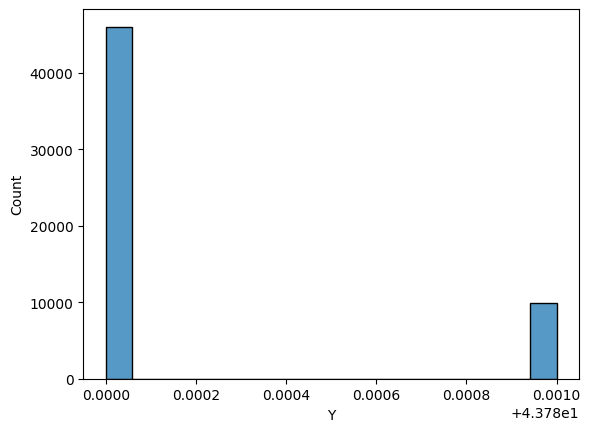

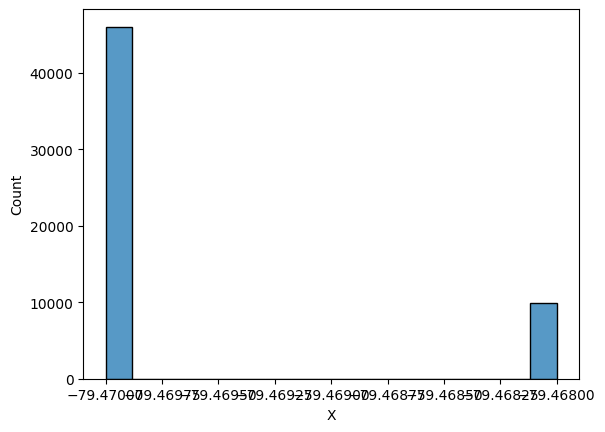

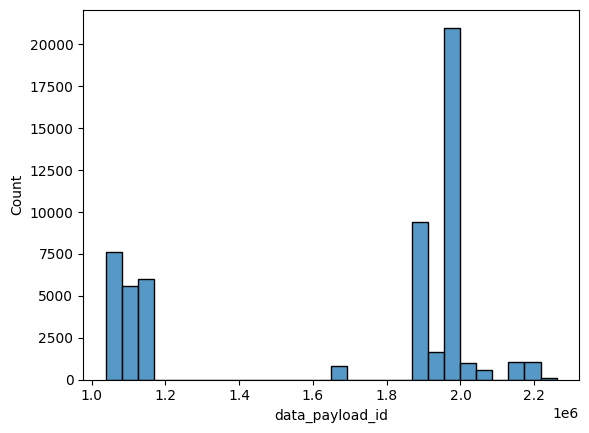

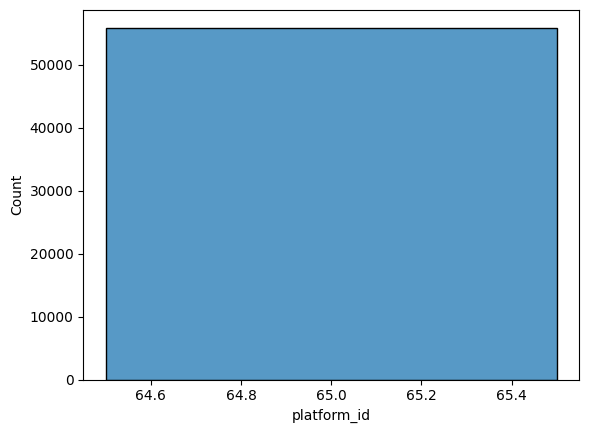

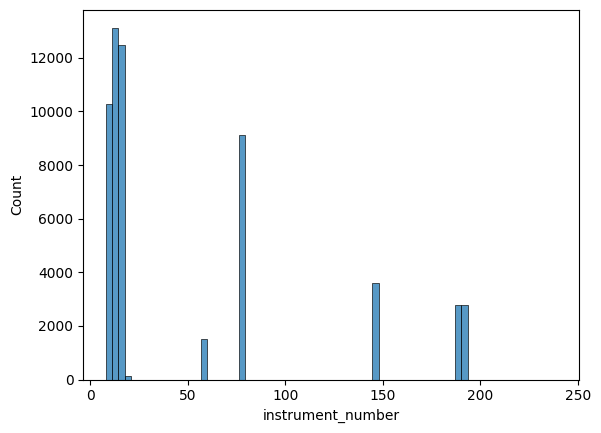

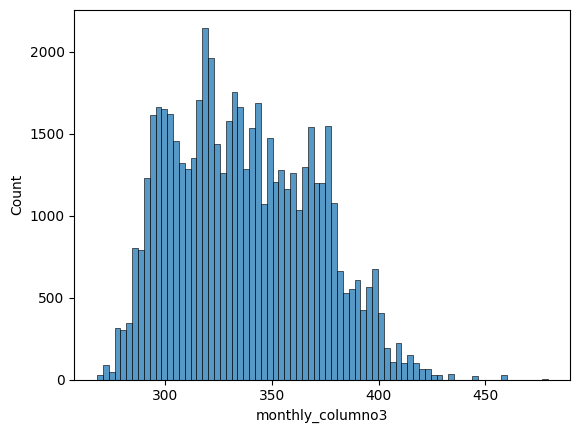

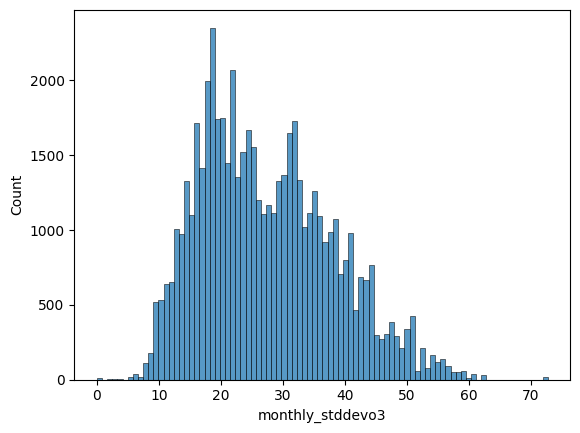

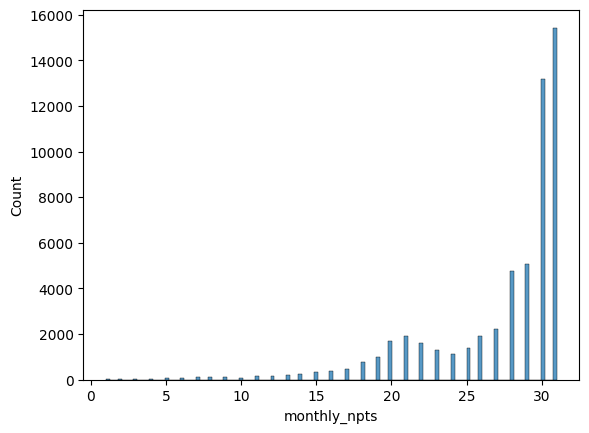

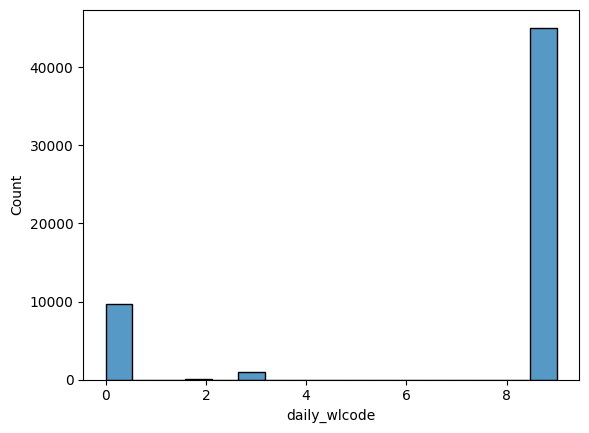

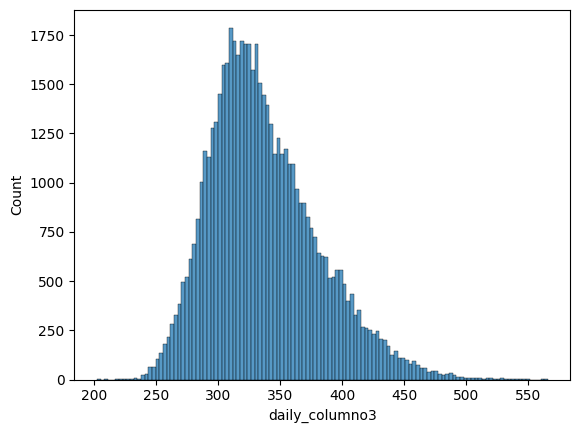

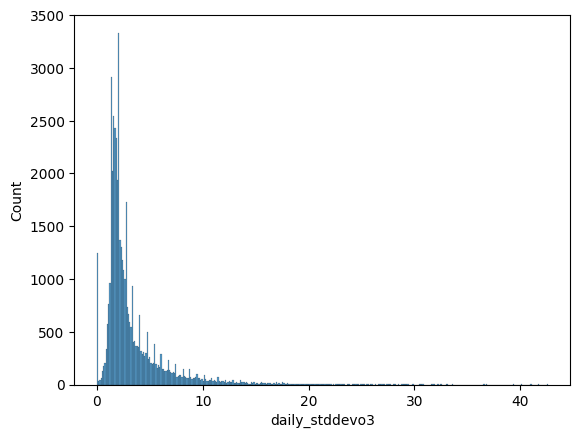

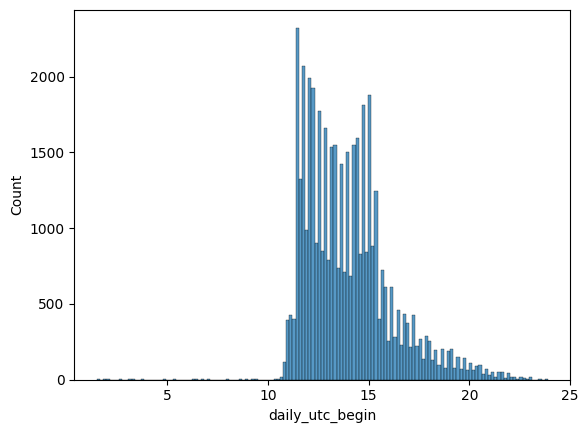

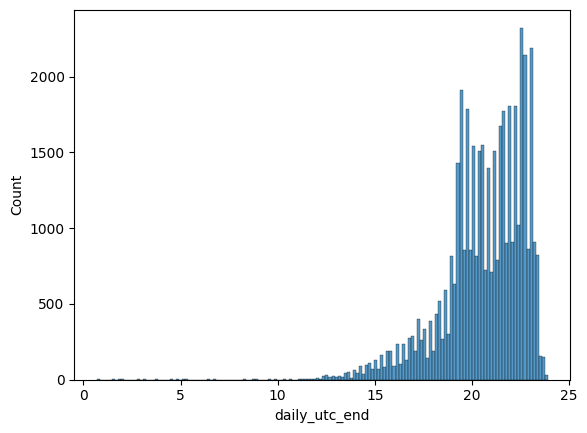

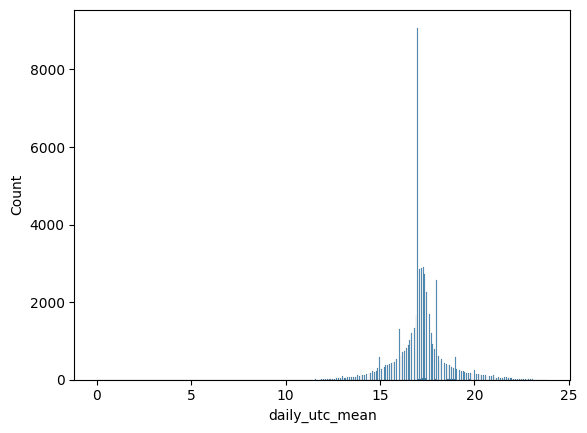

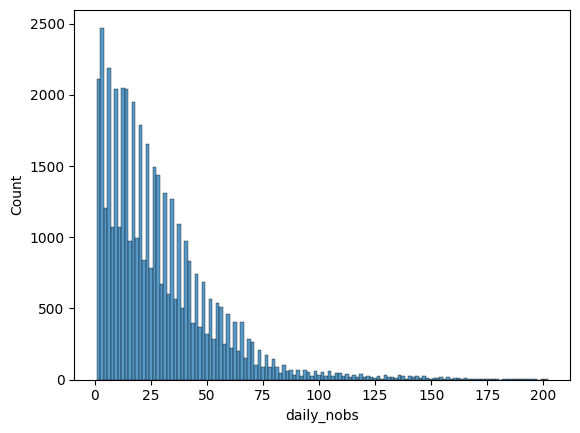

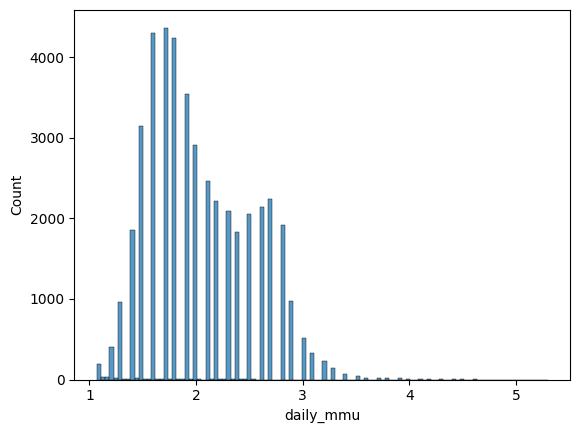

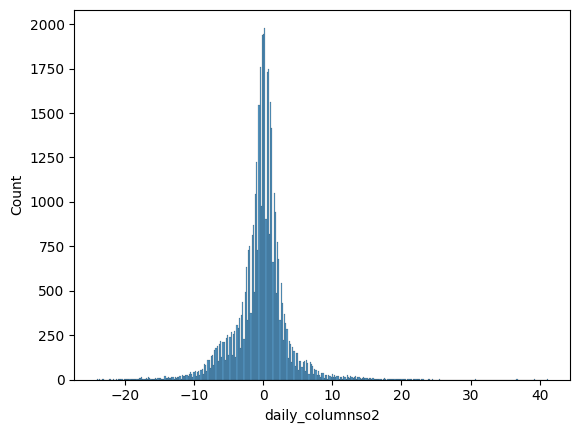

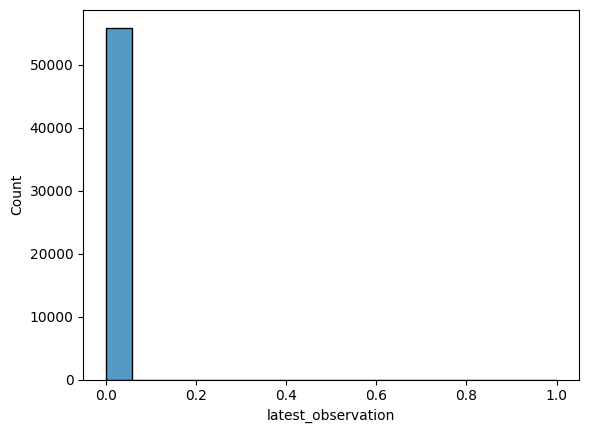

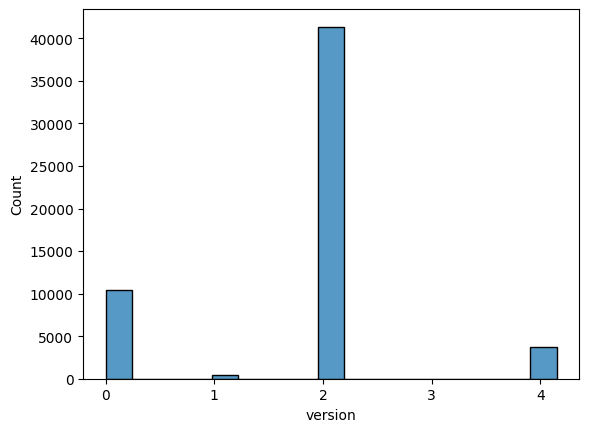

In [11]:
#step 4 exploratory Data Analysis (EDA)

#object value
print(df.describe(include='object'))
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

####KDE Plot for better understaning of Distribution

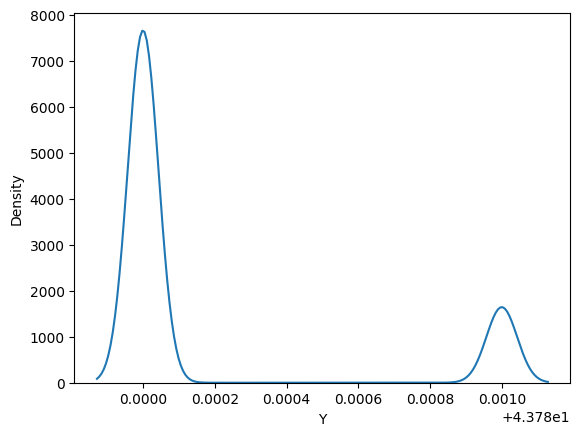

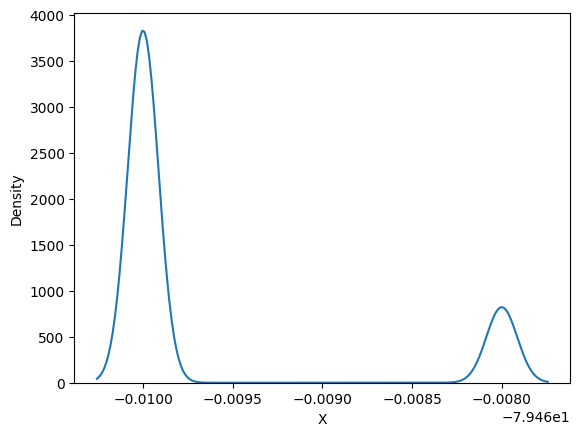

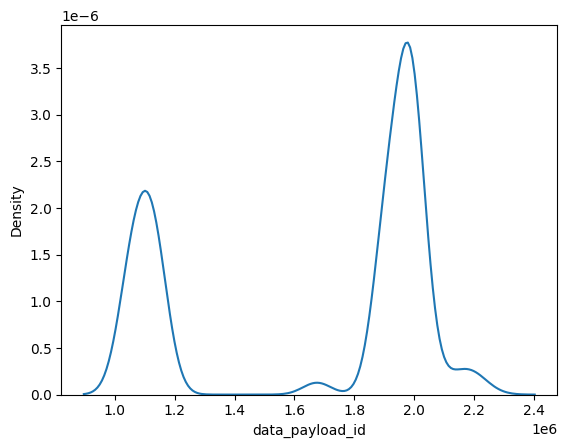

c:\Users\Abir Hossain\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  


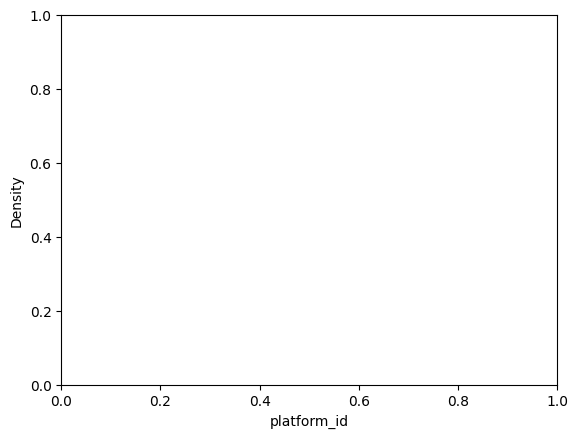

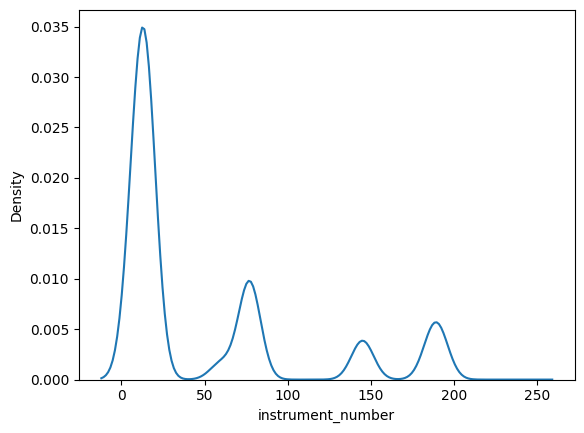

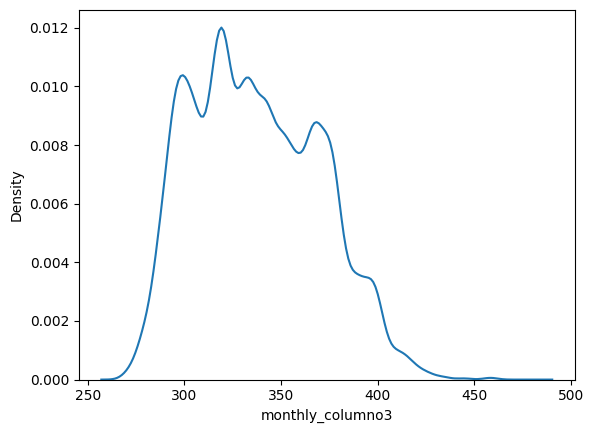

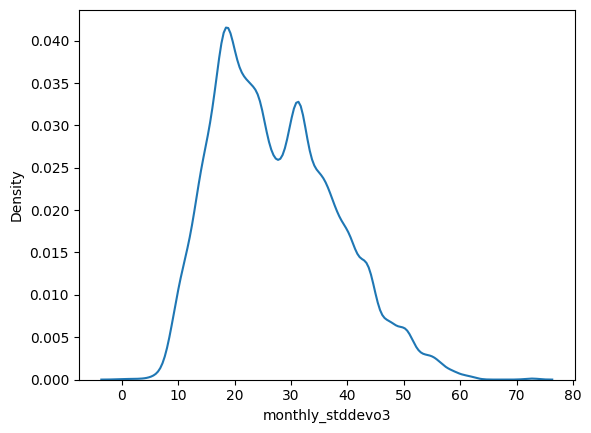

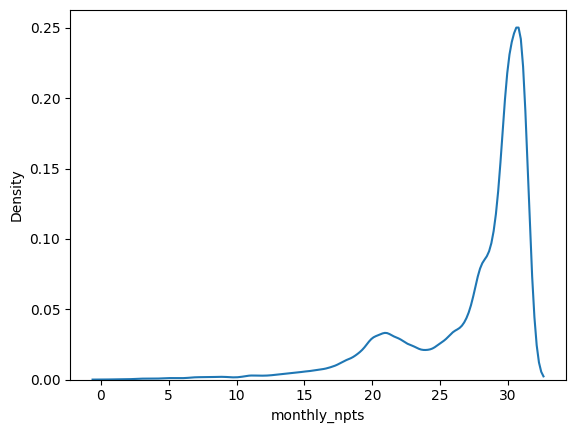

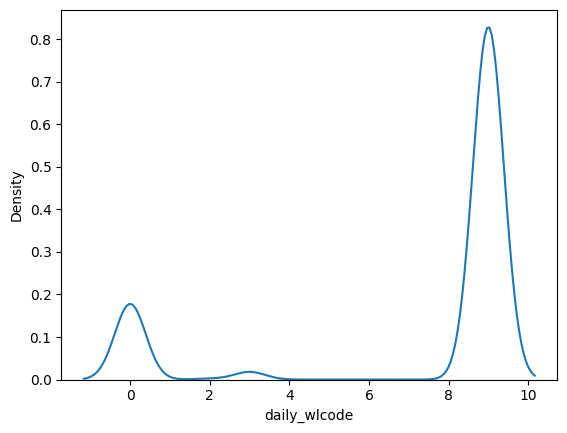

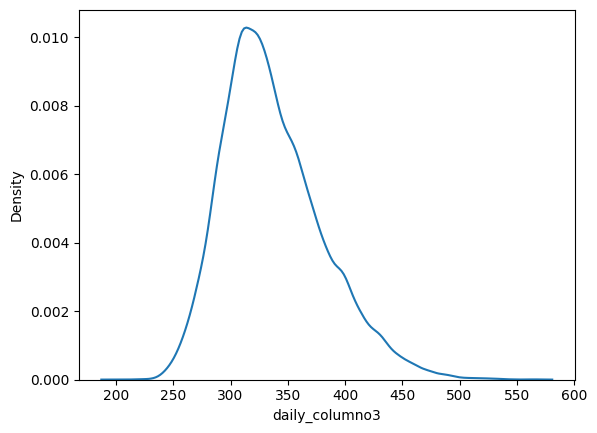

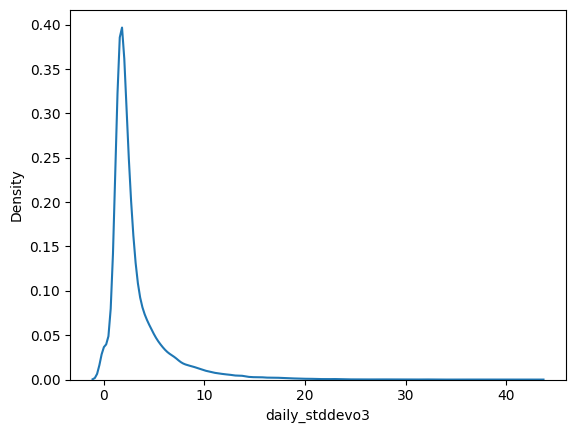

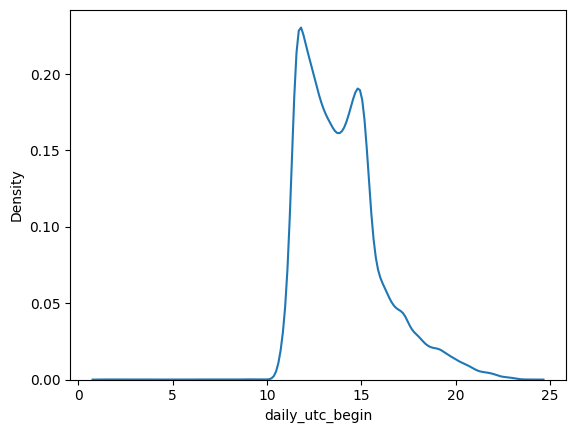

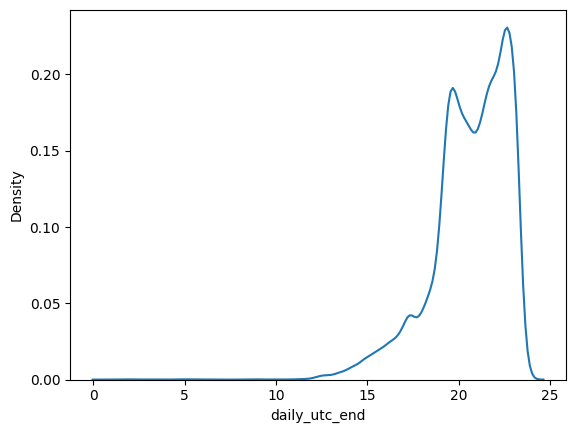

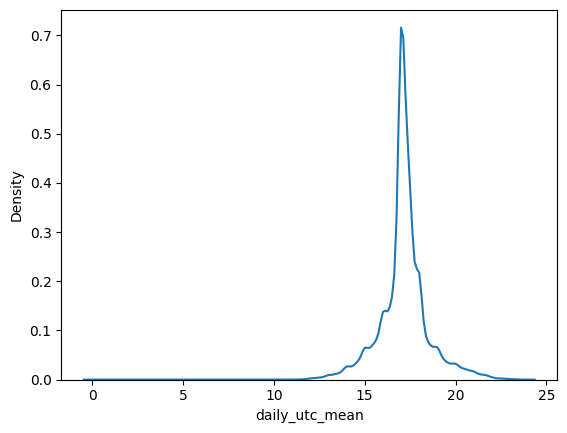

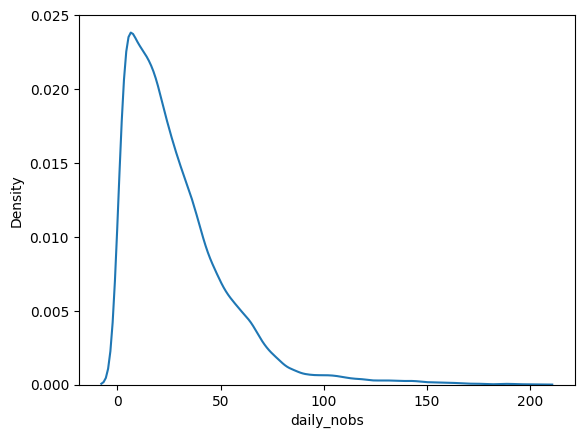

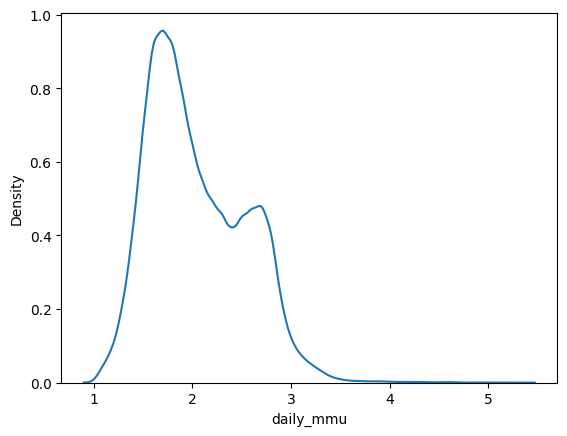

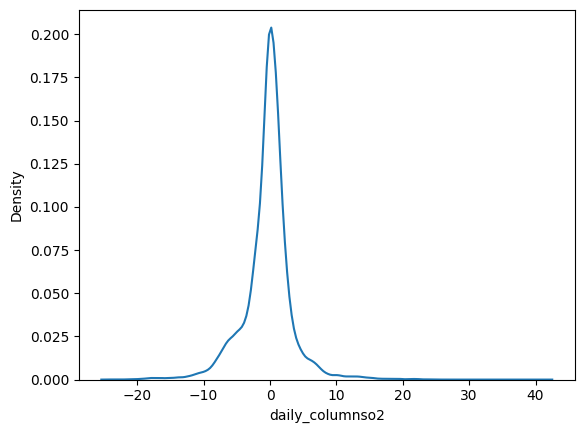

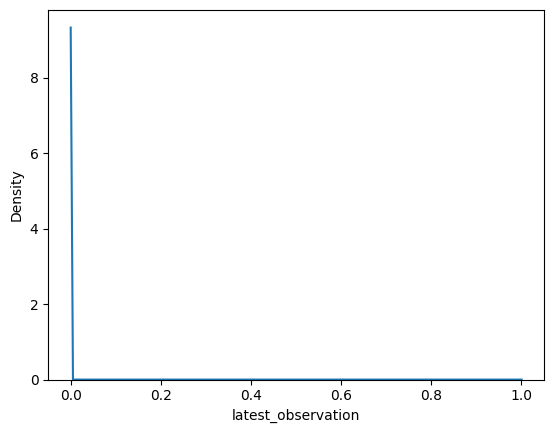

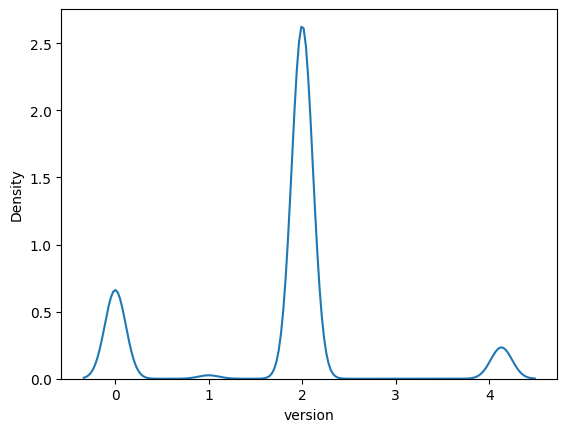

In [12]:
for i in df.select_dtypes(include=['number', 'datetime']).columns:
  sns.kdeplot(data=df, x=i)
  plt.show()

In [14]:
print(df.columns)

Index(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_columno3', 'monthly_stddevo3', 'monthly_npts',
       'daily_date', 'daily_wlcode', 'daily_obscode', 'daily_columno3',
       'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'],
      dtype='object')


####Scatter plot to understanf the relationship

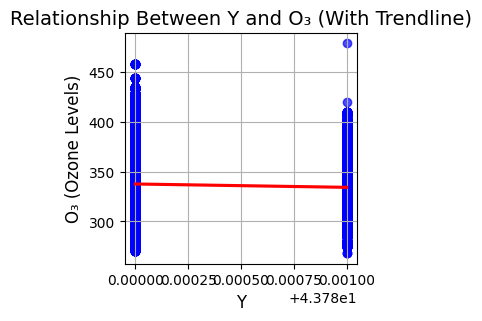

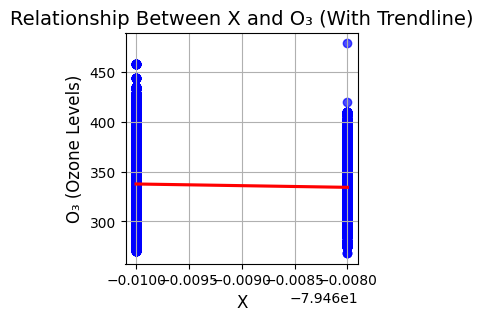

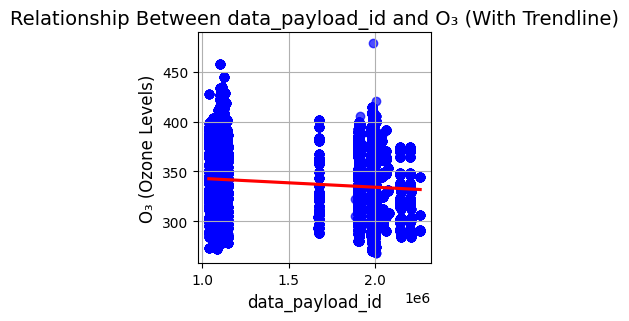

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U22'), dtype('float64')) -> None

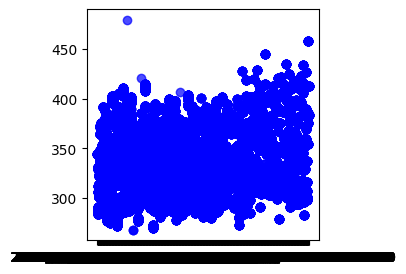

In [16]:
# # #scatter plot understand the relationship
## List of features to analyze


features =['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts',
       'daily_date', 'daily_wlcode', 'daily_obscode', 'daily_columno3',
       'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version']

for feature in features:
        plt.figure(figsize=(3, 3))
        sns.regplot(
            data=df,
            x=feature,
            y='monthly_columno3',
            scatter_kws={'alpha': 0.7, 'color': 'blue'},
            line_kws={'color': 'red'}
        )
        plt.title(f'Relationship Between {feature} and O₃ (With Trendline)', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('O₃ (Ozone Levels)', fontsize=12)
        plt.grid(True)
        plt.show()


####Correlation with heatmap to intrepret the relation and multicollinarity

<AxesSubplot:>

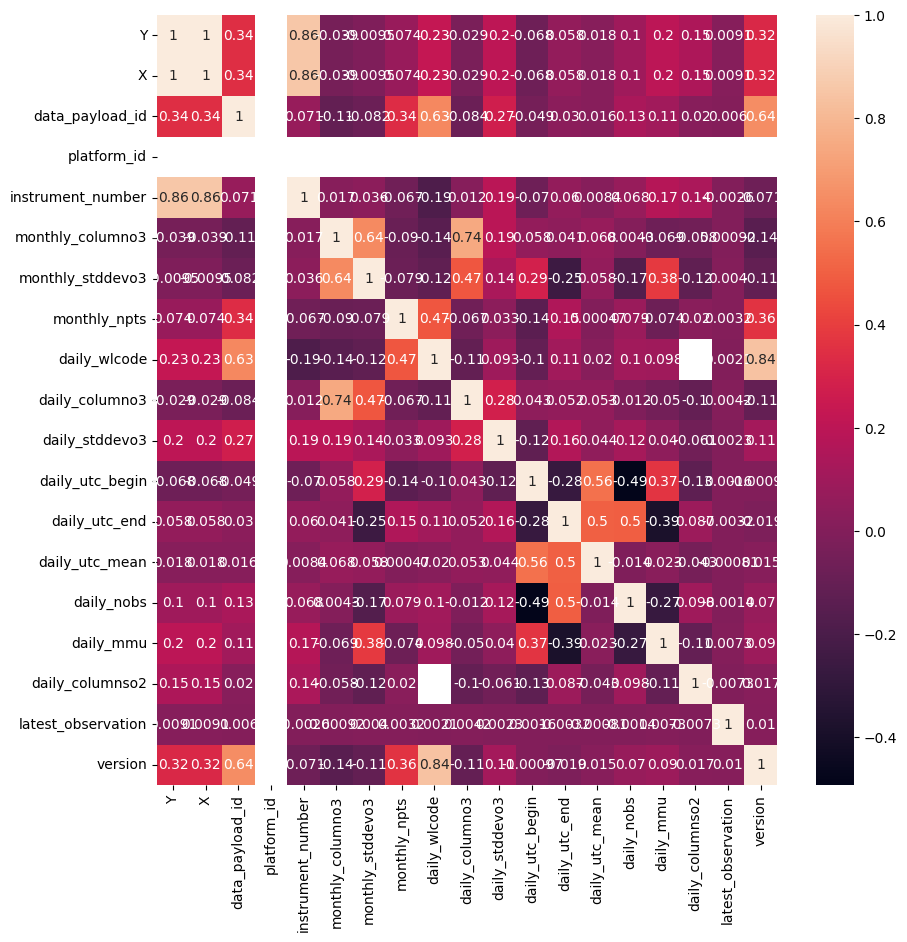

In [17]:
# correlation with heatmap to intrepret the relation and multicollinarity
corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

posx and posy should be finite values



Features to REMOVE (Weak negative correlation): ['Y', 'X', 'data_payload_id', 'instrument_number', 'monthly_npts', 'daily_wlcode', 'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean', 'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation', 'version']
Features to KEEP (Strong negative correlation): ['monthly_stddevo3', 'daily_columno3']


posx and posy should be finite values


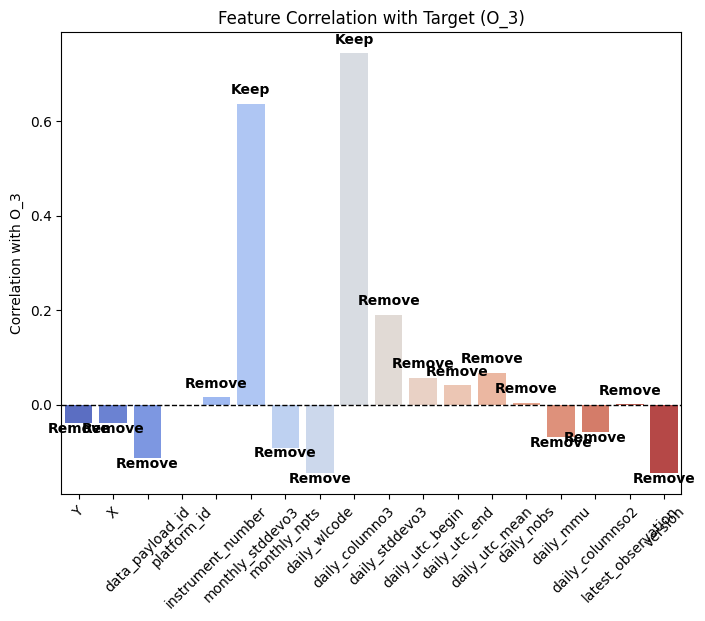

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define correlation threshold (adjustable)
correlation_threshold = 0.3  # Keep features with abs(correlation) >= 0.3

# Get correlations of all features with 'O_3', excluding itself
corr_with_target = corr["monthly_columno3"].drop("monthly_columno3")

# Select features with strong negative correlation (abs value high)
to_remove = corr_with_target[abs(corr_with_target) < correlation_threshold].index.tolist()
to_keep = corr_with_target[abs(corr_with_target) >= correlation_threshold].index.tolist()

# Print results
print("\nFeatures to REMOVE (Weak negative correlation):", to_remove)
print("Features to KEEP (Strong negative correlation):", to_keep)

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    x=corr_with_target.index,
    y=corr_with_target.values,
    palette="coolwarm"
)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line
plt.ylabel("Correlation with O_3")
plt.xticks(rotation=45)
plt.title("Feature Correlation with Target (O_3)")

# Annotate features to be removed
for i, v in enumerate(corr_with_target.values):
    plt.text(i, v + 0.02 if v > 0 else v - 0.02,  
             "Remove" if abs(v) < correlation_threshold else "Keep", 
             color="black", ha="center", fontsize=10, fontweight="bold")

plt.show()


###Finding the outliers of the dataset using BoxPlot

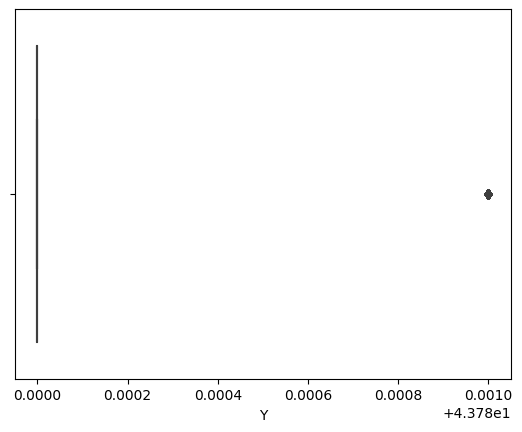

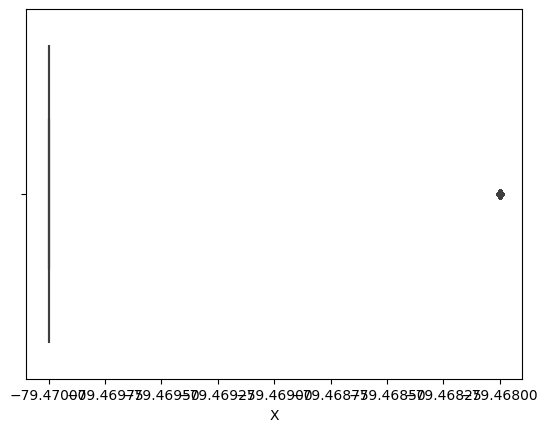

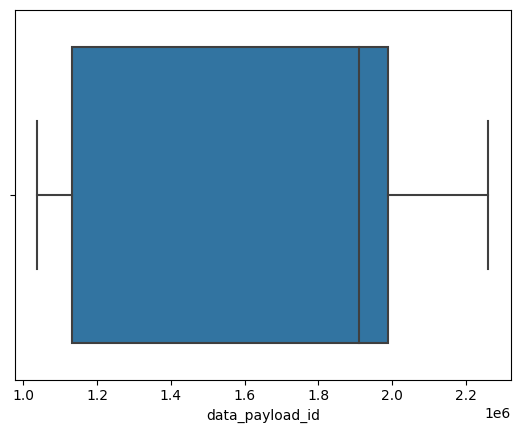

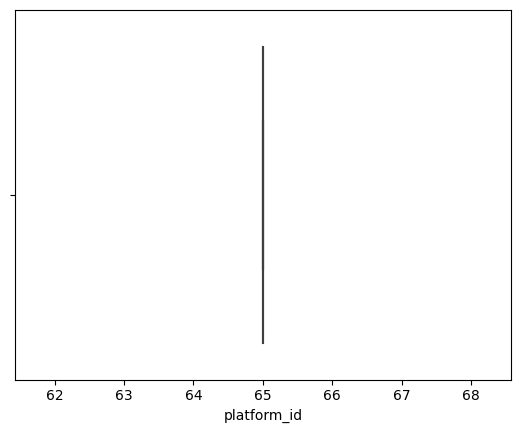

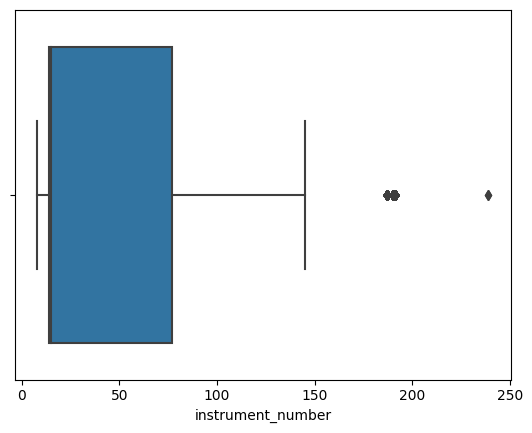

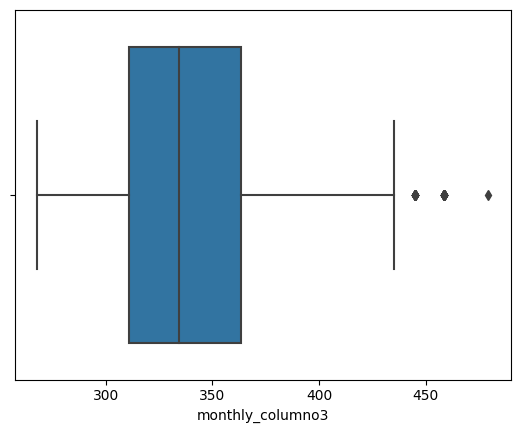

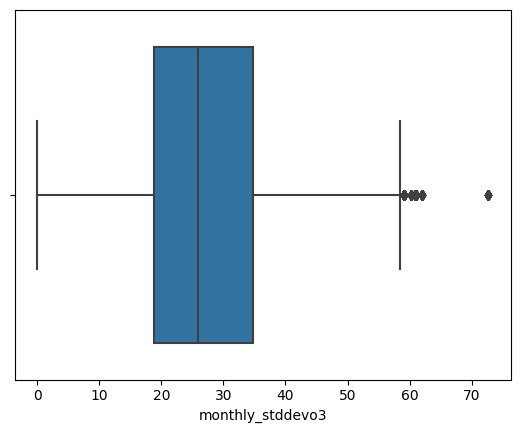

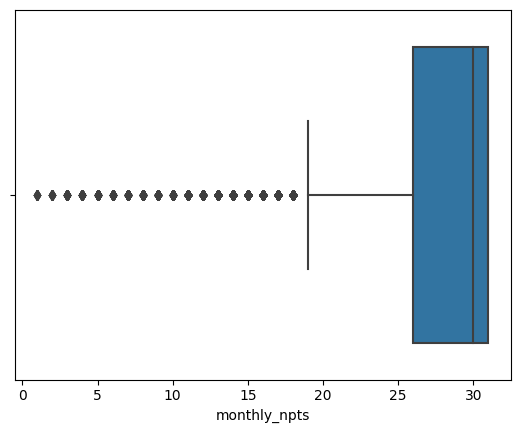

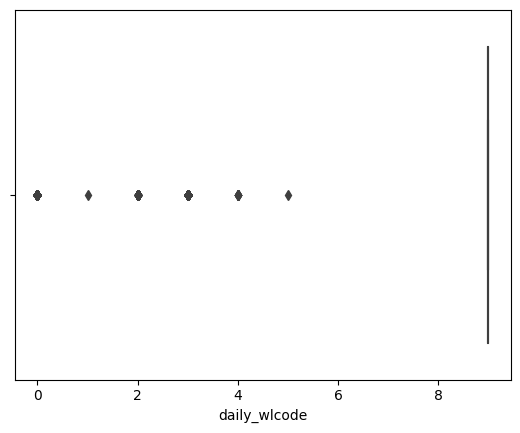

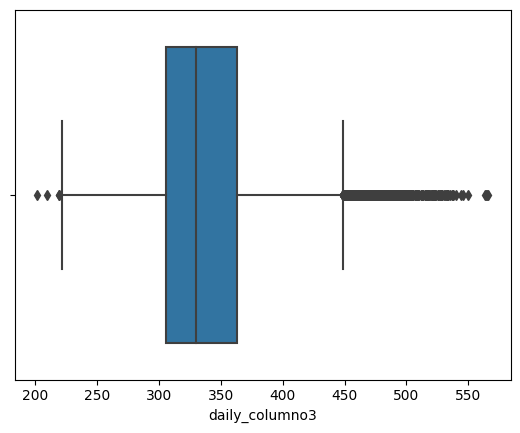

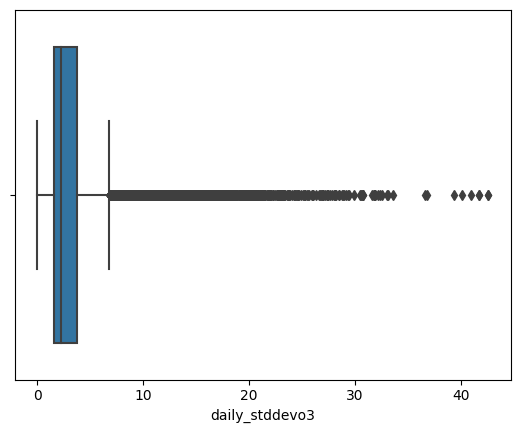

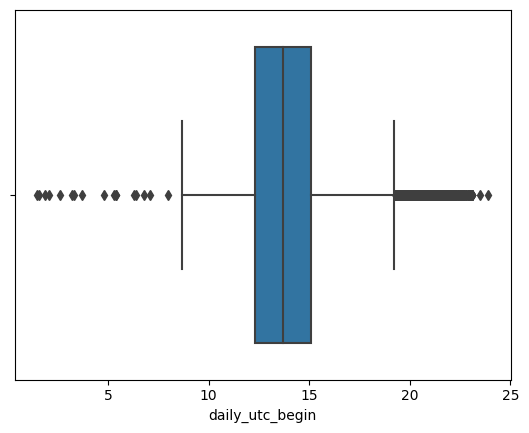

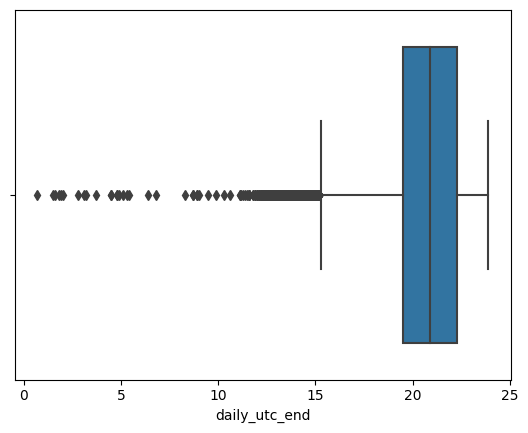

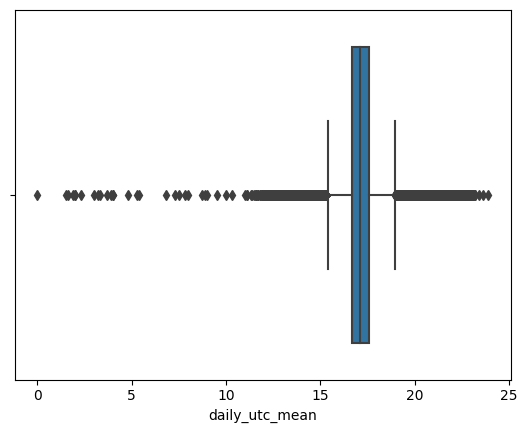

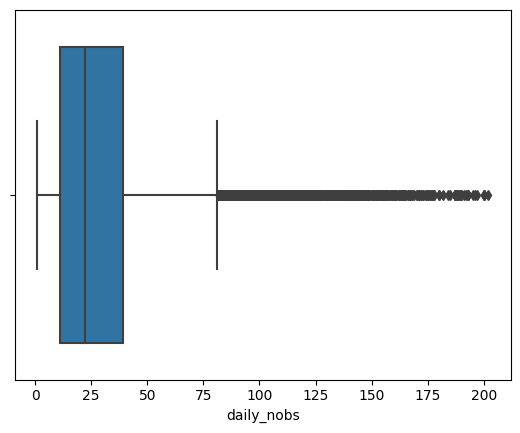

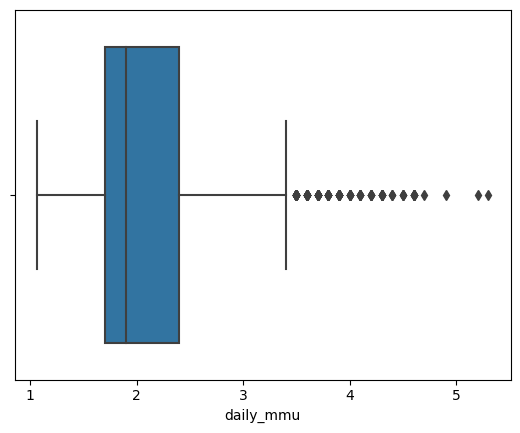

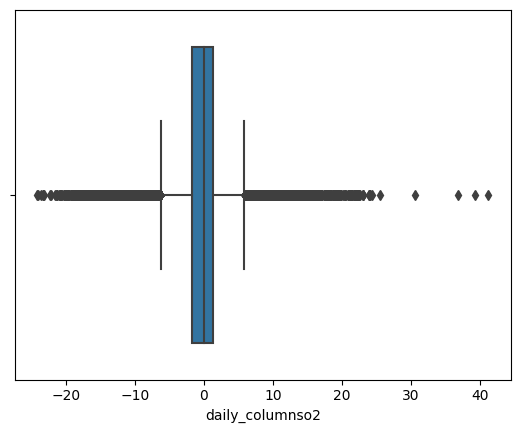

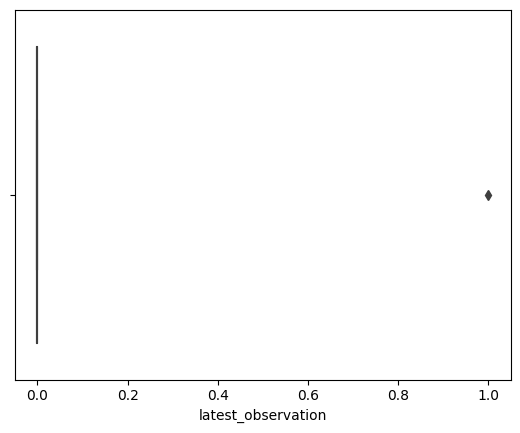

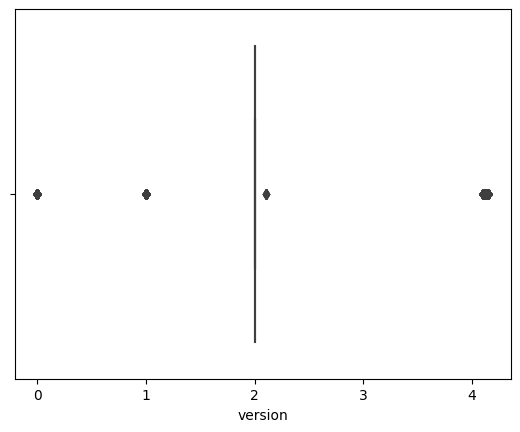

In [21]:
#box plot to understand the outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

#Data Cleaning

In [22]:
#finding missing value
print('Missing Value:')
print(df.isnull().sum())
print('***'*10)
#finding percantage of missing value
print('Percentage of Missing Value:')
print(df.isnull().sum()/df.shape[0]*100)
print('***'*10)
#finding duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('***'*10)
#idenfying garbage value
print('Garbage Value:')
for i in df.select_dtypes(include='object').columns: #cz garbage are in object type value
   print(df[i].value_counts())
   print('***'*10)
# no garbage value as it would show in the last and show the character and the count also


Missing Value:
Y                           0
X                           0
data_payload_id             0
instance_datetime           0
url                         0
agency                      0
platform_type               0
platform_id                 0
platform_name               0
gaw_id                      0
instrument_name             0
instrument_model            0
instrument_number           0
monthly_date                0
monthly_columno3            0
monthly_stddevo3            0
monthly_npts                0
daily_date                  0
daily_wlcode                0
daily_obscode               0
daily_columno3              0
daily_stddevo3          10390
daily_utc_begin         10585
daily_utc_end           10585
daily_utc_mean             36
daily_nobs              10354
daily_mmu               10390
daily_columnso2         10791
latest_observation          0
country                     0
scientific_authority    10390
version                     0
dtype: int64
************

###dropping these features since the missing values percentage is greater than 50% and there are no duplicate value and Garbage values in the dataset


In [28]:
df=df.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
       'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)

df.head()
#[Dropping station as it is irrelevant for our analysis]

,daily_date,daily_columno3
0,23-12-23,371.0
1,27-12-23,365.7
2,30-12-23,391.7
3,06-12-23,379.8
4,17-12-23,336.0


###Cleaning datas where target value (O_3) is Null

In [30]:
df= df.dropna(subset=['daily_columno3']) #i deleted all null rows to check the result
# df= df.dropna(subset=['NO_2'])
# df= df.dropna(subset=['PM10'])
# df= df.dropna(subset=['CO'])
# df= df.dropna(subset=['SO_2'])

print('New Shape after dropping null rows of  value:')
df.shape

New Shape after dropping null rows of  value:


(55885, 2)

###Imputing other NULL values using KNNI Imputer


In [ ]:
# df['CO'].fillna(df['CO'].mean(), inplace = True)
# df['NO_2'].fillna(df['NO_2'].mean(), inplace = True)
# df['SO_2'].fillna(df['SO_2'].mean(), inplace = True)

# df['BEN'].fillna(df['BEN'].mean(), inplace = True)
# df['MXY'].fillna(df['MXY'].mean(), inplace = True)
# df['NMHC'].fillna(df['NMHC'].mean(), inplace = True)
# df['NOx'].fillna(df['NOx'].mean(), inplace = True)


# df['OXY'].fillna(df['OXY'].mean(), inplace = True)
# df['PXY'].fillna(df['PXY'].mean(), inplace = True)
# df['SO_2'].fillna(df['SO_2'].mean(), inplace = True)
# df['TCH'].fillna(df['TCH'].mean(), inplace = True)


# df['TOL'].fillna(df['TOL'].mean(), inplace = True)
# df['PM25'].fillna(df['PM25'].mean(), inplace = True)
# df['NO'].fillna(df['NO'].mean(), inplace = True)
# df['CH4'].fillna(df['CH4'].mean(), inplace = True)

In [31]:
print('Result After imputing:\n',df.isnull().sum())
df.shape

Result After imputing:
 daily_date        0
daily_columno3    0
dtype: int64


(55885, 2)

### Caluculating wisker to treat outliers

In [32]:
#Outlier treatment
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return lower_bound,upper_bound
df.columns

Index(['daily_date', 'daily_columno3'], dtype='object')

###Treating those values which have outliers

In [33]:
for i in ["daily_columno3"]:
  lw,uk=wisker(df[i])
  df[i]=np.where(df[i]>uk,uk,df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])

###Checking if outliers are fixed or not

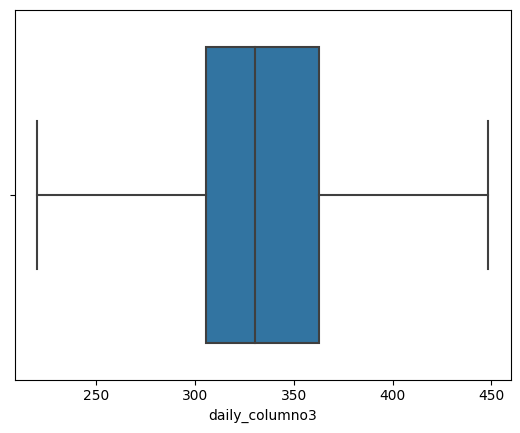

In [34]:
for i in ["daily_columno3"]:
  sns.boxplot(data=df,x=i)
  plt.show()

####Data Before Cleaning Vs Data After Cleaning

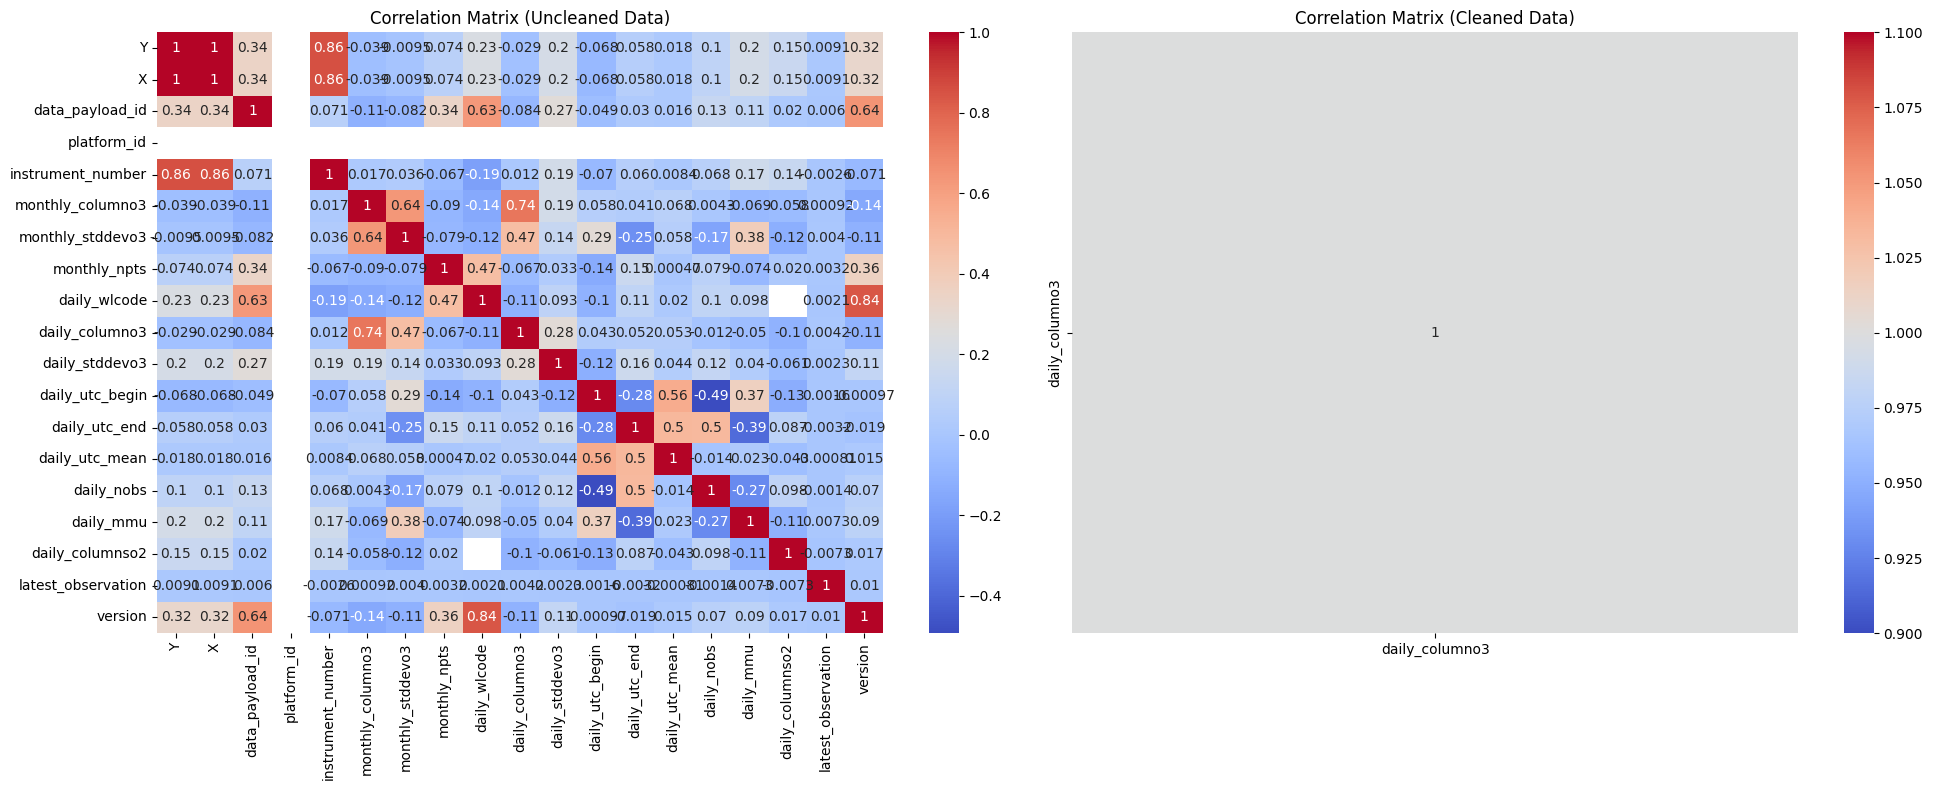

In [35]:

# Calculate correlation for uncleaned data
corr_uncleaned = df_init.select_dtypes(include='number').corr()

# Calculate correlation for cleaned data
corr_cleaned = df.select_dtypes(include='number').corr()

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for uncleaned data
sns.heatmap(corr_uncleaned, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix (Uncleaned Data)')

# Heatmap for cleaned data
sns.heatmap(corr_cleaned, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (Cleaned Data)')

plt.tight_layout()
plt.show()

###Scalling the Data

In [36]:

# Select numeric columns (exclude 'date')
numeric_columns = df.select_dtypes(include=['number']).columns  # Selects only numeric columns

# Apply MinMax Scaling only to numeric columns
scaler = MinMaxScaler()
df_scaled = df.copy()  # Create a copy to keep the date column
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Scale only numeric columns

# Display results
print("Data Before Scaling:")
print(df.head())

print("\nData After Scaling:")
print(df_scaled.head())


Data Before Scaling:
  daily_date  daily_columno3
0   23-12-23           371.0
1   27-12-23           365.7
2   30-12-23           391.7
3   06-12-23           379.8
4   17-12-23           336.0

Data After Scaling:
  daily_date  daily_columno3
0   23-12-23        0.660526
1   27-12-23        0.637281
2   30-12-23        0.751316
3   06-12-23        0.699123
4   17-12-23        0.507018


###Splitting Datset

In [54]:

df_scaled['daily_date'] = pd.to_datetime(df_scaled['daily_date'])


# df["daily_columno3"] = (df["daily_columno3"] - df["daily_columno3"].min())  # Now 'date' is an integer

# # Select only numeric columns
# numeric_columns = df.columns

# # Apply MinMax Scaling
# scaler = MinMaxScaler()
# df_scaled = df.copy()
# df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # ✅ Convert to cuDF after fixing the date issue
# df_scaled_cudf = cudf.DataFrame.from_pandas(df_scaled)

# # Drop 'O_3' column for predictors (x) and set 'O_3' as target (y)
# x = df_scaled_cudf.drop('O_3', axis=1)
# y = df_scaled_cudf['O_3']

# Split the data using cuML's train_test_split

# ✅ Print to check if date values are retained
# print(df_scaled_cudf.head())
df.head()

,daily_date,daily_columno3
0,2023-12-23,150.6
1,2023-12-27,145.3
2,2023-12-30,171.3
3,2023-06-12,159.4
4,2023-12-17,115.6


In [67]:
x_train, x_test, y_train, y_test = train_test_split(df['daily_date'],df['daily_columno3'], test_size=0.3, random_state=42)
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
x_test = x_test.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
x_train = x_train.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y_train = y_train.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y_test = y_test.map(pd.Timestamp.toordinal).values.reshape(-1, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'map'

#Model Train

### 1. Linear Regression

In [62]:

model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [64]:
y_predict=model1.predict(x_test)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

Mean Absolute Error (MAE): 0.07840909070016719
Explained Variance Score: 0.3778554036259435
Mean of Residuals (in percentage): 0.008576722642561225%


<Axes: ylabel='Density'>

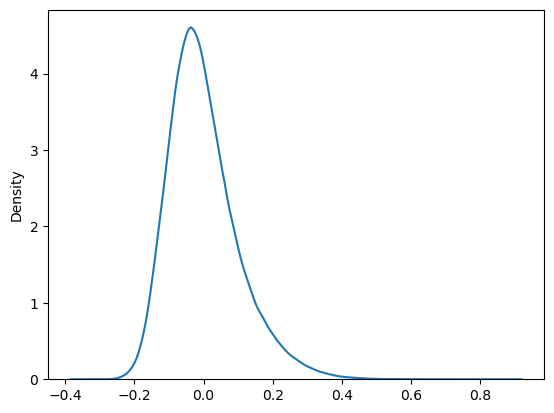

In [89]:
import cudf
import cupy as cp
import seaborn as sns
from cuml.metrics import mean_absolute_error

# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_test_gpu = y_test.to_cupy()  # Convert to cuPy array for GPU-based operations
y_predict_gpu1 = y_predict.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae1 = mean_absolute_error(y_test_gpu, y_predict_gpu1)

# Manually calculate Explained Variance Score
residuals1 = y_test_gpu - y_predict_gpu1
explained_variance1 = 1 - cp.var(residuals1) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae1}")
print(f"Explained Variance Score: {explained_variance1}")

# Residual Calculation
residue_gpu1 = residuals1
print(f"Mean of Residuals (in percentage): {residue_gpu1.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu1.get())  # .get() moves the data to CPU for plotting


### 2. Random Forest Regressor

In [90]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

/home/t2420363/miniconda3/envs/rapids-23.12/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestRegressor()

In [91]:
y_predict2=model2.predict(x_test)

Mean Absolute Error (MAE): 0.054365879165510445
Explained Variance Score: 0.6569777279077411
Mean of Residuals (in percentage): -0.016778364519653213%


<Axes: ylabel='Density'>

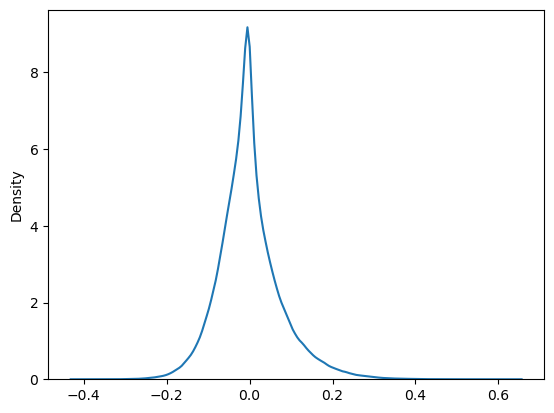

In [94]:

# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_predict_gpu2 = y_predict2.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae2 = mean_absolute_error(y_test_gpu, y_predict_gpu2)

# Manually calculate Explained Variance Score
residuals2 = y_test_gpu - y_predict_gpu2
explained_variance2 = 1 - cp.var(residuals2) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae2}")
print(f"Explained Variance Score: {explained_variance2}")

# Residual Calculation
residue_gpu2 = residuals2
print(f"Mean of Residuals (in percentage): {residue_gpu2.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu2.get())  # .get() moves the data to CPU for plotting


###5. Ridge Regressor

In [95]:
model5=Ridge(alpha=0.1)
model5.fit(x_train,y_train)


Ridge()

In [96]:
y_predict5=model5.predict(x_test)

Mean Absolute Error (MAE): 0.07840907961840278
Explained Variance Score: 0.37785554971487767
Mean of Residuals (in percentage): 0.008577632521984024%


<Axes: ylabel='Density'>

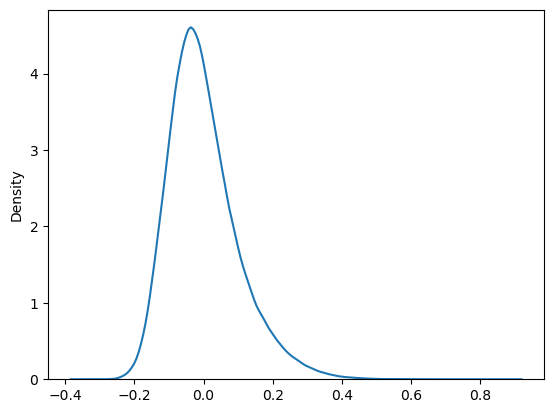

In [97]:


# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_predict_gpu5 = y_predict5.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae5 = mean_absolute_error(y_test_gpu, y_predict_gpu5)

# Manually calculate Explained Variance Score
residuals5 = y_test_gpu - y_predict_gpu5
explained_variance5 = 1 - cp.var(residuals5) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae5}")
print(f"Explained Variance Score: {explained_variance5}")

# Residual Calculation
residue_gpu5 = residuals5
print(f"Mean of Residuals (in percentage): {residue_gpu5.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu5.get())  # .get() moves the data to CPU for plotting


#Performance Comparison

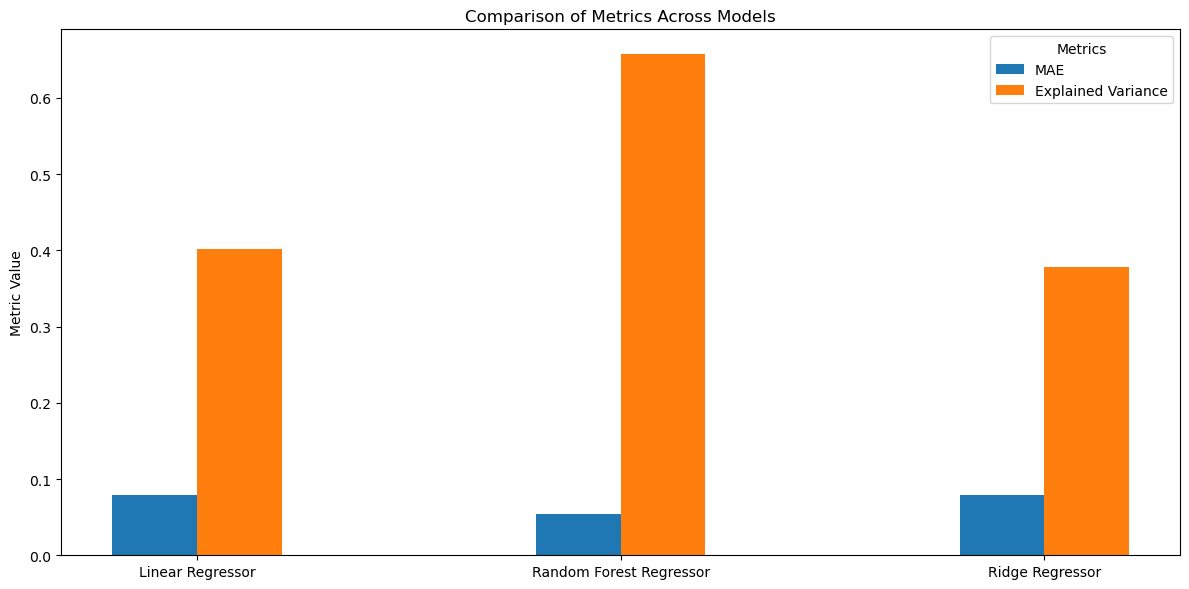

In [99]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Example values for metrics (ensure that these are CuPy arrays or GPU-based)Mean Absolute Error (MAE):


l_mae1 = cp.array([0.07840909070016719])  # Replace with actual GPU results
l_mae2 = cp.array([0.054365879165510445])
l_mae5 = cp.array([0.07840907961840278])

explained_variance1 = cp.array([0.40139815623400665])
explained_variance2 = cp.array([ 0.6569777279077411])
explained_variance5 = cp.array([0.3778554036259435])

# Convert CuPy arrays to NumPy arrays for compatibility with plotting
metric_values = np.array([
    [l_mae1.get()[0], l_mae2.get()[0], l_mae5.get()[0]],  # Access scalar values
    [explained_variance1.get()[0], explained_variance2.get()[0], explained_variance5.get()[0]],  # Access scalar values
])

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
model_names = ["Linear Regressor", "Random Forest Regressor", 'Ridge Regressor']
metrics = ["MAE", "Explained Variance"]
x = np.arange(len(model_names))

bar_width = 0.2
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, metric_values[i], width=bar_width, label=metric)

ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of Metrics Across Models")
ax.legend(title="Metrics")
plt.tight_layout()
plt.show()
